In [3]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn import preprocessing
pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows', 500)
%matplotlib inline
plt.style.use('bmh')
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [4]:
# class color:
#    PURPLE = '\033[95m'
#    CYAN = '\033[96m'
#    DARKCYAN = '\033[36m'
#    BLUE = '\033[94m'
#    GREEN = '\033[92m'
#    YELLOW = '\033[93m'
#    RED = '\033[91m'
#    BOLD = '\033[1m'
#    UNDERLINE = '\033[4m'
#    END = '\033[0m'

# <center>Data Extraction</center>

I am interested in analysing some of the stock data of big corporations. Curious to know how are they performing during this pandemic <br> (Facebook, Amazon, Google, Microsoft, twitter, Apple, Nvidia) <br> and top banks in Canada i.e. (RY,TD,BMO,BNS,CM) {RBC,TD,BMO,BNS,CM}

In [5]:
top_companies = ['FB','AMZN','GOOGL','MSFT','TWTR','AAPL','NVDA']
top_banks = ['RY','TD','BMO','BNS','CM']
companies = yf.download(top_companies,'2008-01-01','2020-04-01')
banks = yf.download(top_banks,'2008-01-01','2020-04-01')

[*********************100%***********************]  7 of 7 completed
[*********************100%***********************]  5 of 5 completed


Data has been downloaded, now lets have a look at how our data looks like:

In [6]:
companies.head()

Adj Close                                                        \
                 AAPL       AMZN  FB       GOOGL       MSFT       NVDA TWTR   
Date                                                                          
2008-01-02  24.096073  96.250000 NaN  342.937927  26.449528  30.367865  NaN   
2008-01-03  24.107191  95.209999 NaN  343.007996  26.562189  30.128672  NaN   
2008-01-04  22.266973  88.790001 NaN  328.828827  25.818710  27.598787  NaN   
2008-01-07  21.968927  88.820000 NaN  324.949951  25.991440  24.746918  NaN   
2008-01-08  21.178667  87.879997 NaN  316.156158  25.120293  25.271288  NaN   

                Close                                                        \
                 AAPL       AMZN  FB       GOOGL       MSFT       NVDA TWTR   
Date                                                                          
2008-01-02  27.834286  96.250000 NaN  342.937927  35.220001  33.009998  NaN   
2008-01-03  27.847143  95.209999 NaN  343.007996  35.369999  32.750000  NaN   
2008-01-04  25.721428  88.790001 NaN  328.828827  34.380001  30.000000  NaN   
2008-01-07  25.377142  88.820000 NaN  324.949951  34.610001  26.900000  NaN   
2008-01-08  24.464285  87.879997 NaN  316.156158  33.450001  27.469999  NaN   

                 High                                                        \
                 AAPL       AMZN  FB       GOOGL       MSFT       NVDA TWTR   
Date                                                                          
2008-01-02  28.608572  97.430000 NaN  349.034027  35.959999  34.250000  NaN   
2008-01-03  28.198572  97.250000 NaN  343.768768  35.650002  33.860001  NaN   
2008-01-04  27.571428  93.400002 NaN  340.820831  35.200001  31.930000  NaN   
2008-01-07  26.228571  90.570000 NaN  331.471466  34.799999  30.450001  NaN   
2008-01-08  26.065714  91.830002 NaN  330.310303  34.709999  29.290001  NaN   

                  Low                                                        \
                 AAPL       AMZN  FB       GOOGL       MSFT       NVDA TWTR   
Date                                                                          
2008-01-02  27.507143  94.699997 NaN  339.204193  35.000000  32.560001  NaN   
2008-01-03  27.527143  94.519997 NaN  338.598602  34.860001  32.630001  NaN   
2008-01-04  25.555714  88.500000 NaN  327.827820  34.090000  29.799999  NaN   
2008-01-07  24.318571  85.470001 NaN  318.993988  34.250000  26.350000  NaN   
2008-01-08  24.400000  86.930000 NaN  315.815826  33.400002  26.420000  NaN   

                 Open                                                        \
                 AAPL       AMZN  FB       GOOGL       MSFT       NVDA TWTR   
Date                                                                          
2008-01-02  28.467142  95.349998 NaN  346.781769  35.790001  34.119999  NaN   
2008-01-03  27.915714  96.059998 NaN  342.972961  35.220001  33.200001  NaN   
2008-01-04  27.350000  93.260002 NaN  340.185181  35.189999  31.770000  NaN   
2008-01-07  25.892857  88.620003 NaN  327.297302  34.549999  30.200001  NaN   
2008-01-08  25.734285  87.550003 NaN  326.826813  34.709999  27.049999  NaN   

               Volume                                                   
                 AAPL      AMZN  FB     GOOGL      MSFT      NVDA TWTR  
Date                                                                    
2008-01-02  269794700  13858700 NaN   8605100  63004200  12099100  NaN  
2008-01-03  210516600   9122500 NaN   6498400  49599600  11882700  NaN  
2008-01-04  363958000  10270000 NaN  10708800  72090800  18402300  NaN  
2008-01-07  518048300   9981600 NaN  12793900  80164300  25170000  NaN  
2008-01-08  380954000  12283300 NaN  10667500  79148300  27673900  NaN

In [7]:
banks.head()

Adj Close                                                  Close  \
                  BMO        BNS         CM         RY         TD        BMO   
Date                                                                           
2008-01-02  28.487125  25.824650  31.996675  28.206547  15.603374  55.919998   
2008-01-03  28.874292  25.638714  31.794649  28.095015  15.553451  56.680000   
2008-01-04  28.125435  24.786497  30.528605  27.498318  15.199454  55.209999   
2008-01-07  28.410717  24.409462  30.910219  27.297564  14.836370  55.770000   
2008-01-08  28.084690  24.047913  29.877628  27.163721  14.682057  55.130001   

                                                             High             \
                  BNS         CM         RY         TD        BMO        BNS   
Date                                                                           
2008-01-02  50.000000  71.269997  50.580002  34.380001  57.070000  50.779999   
2008-01-03  49.639999  70.820000  50.380001  34.270000  56.980000  50.119999   
2008-01-04  47.990002  68.000000  49.310001  33.490002  56.650002  49.270000   
2008-01-07  47.259998  68.849998  48.950001  32.689999  56.040001  48.520000   
2008-01-08  46.560001  66.550003  48.709999  32.349998  56.810001  48.040001   

                                                   Low                        \
                   CM         RY         TD        BMO        BNS         CM   
Date                                                                           
2008-01-02  72.089996  51.360001  34.970001  55.790001  49.880001  70.760002   
2008-01-03  71.389999  50.919998  34.520000  55.639999  49.189999  70.080002   
2008-01-04  71.160004  50.139999  34.014999  54.959999  47.889999  67.849998   
2008-01-07  69.410004  49.750000  33.794998  54.889999  47.040001  66.839996   
2008-01-08  69.949997  49.930000  33.389999  55.130001  46.430000  66.190002   

                                       Open                                   \
                   RY         TD        BMO        BNS         CM         RY   
Date                                                                           
2008-01-02  50.279999  34.224998  57.020000  50.730000  71.620003  51.119999   
2008-01-03  49.910000  33.845001  56.009998  50.029999  71.389999  50.919998   
2008-01-04  49.200001  33.410000  56.650002  49.270000  70.550003  50.119999   
2008-01-07  48.619999  32.384998  55.709999  48.130001  69.230003  49.110001   
2008-01-08  48.669998  32.305000  56.410000  47.650002  69.949997  49.060001   

                       Volume                                   
                   TD     BMO     BNS      CM      RY       TD  
Date                                                            
2008-01-02  34.965000  222200  213600  299000  486300  1784600  
2008-01-03  34.450001  203100  158400  149900  590300  1763600  
2008-01-04  33.985001  200800  190100  302600  712800  2030800  
2008-01-07  33.299999  401200  312600  374800  992600  9169600  
2008-01-08  32.814999  266700  253500  371800  961000  5282200

It can be seen from the data that it has multi-index columns. You can work with the existing data but I'd like to clean it up a little bit

In [8]:
lis = [companies, banks]
for i in lis:
    i.columns = ['_'.join(col) for col in i.columns]
    print(i.columns)
del lis

Index(['Adj Close_AAPL', 'Adj Close_AMZN', 'Adj Close_FB', 'Adj Close_GOOGL',
       'Adj Close_MSFT', 'Adj Close_NVDA', 'Adj Close_TWTR', 'Close_AAPL',
       'Close_AMZN', 'Close_FB', 'Close_GOOGL', 'Close_MSFT', 'Close_NVDA',
       'Close_TWTR', 'High_AAPL', 'High_AMZN', 'High_FB', 'High_GOOGL',
       'High_MSFT', 'High_NVDA', 'High_TWTR', 'Low_AAPL', 'Low_AMZN', 'Low_FB',
       'Low_GOOGL', 'Low_MSFT', 'Low_NVDA', 'Low_TWTR', 'Open_AAPL',
       'Open_AMZN', 'Open_FB', 'Open_GOOGL', 'Open_MSFT', 'Open_NVDA',
       'Open_TWTR', 'Volume_AAPL', 'Volume_AMZN', 'Volume_FB', 'Volume_GOOGL',
       'Volume_MSFT', 'Volume_NVDA', 'Volume_TWTR'],
      dtype='object')
Index(['Adj Close_BMO', 'Adj Close_BNS', 'Adj Close_CM', 'Adj Close_RY',
       'Adj Close_TD', 'Close_BMO', 'Close_BNS', 'Close_CM', 'Close_RY',
       'Close_TD', 'High_BMO', 'High_BNS', 'High_CM', 'High_RY', 'High_TD',
       'Low_BMO', 'Low_BNS', 'Low_CM', 'Low_RY', 'Low_TD', 'Open_BMO',
       'Open_BNS', 'Open_CM', 'O

Rearranging the column names so as to keep them in order:

In [9]:
l = []
for i in top_companies:
    print(i)
    col=[col for col in companies.columns if i in col]
    l.extend(col)
companies.columns = l
companies = companies.reset_index()
print(companies.columns)

M = []
for i in top_banks:
    print(i)
    kol=[kol for kol in banks.columns if i in kol]
    M.extend(kol)
banks.columns = M
banks = banks.reset_index()
print(banks.columns)
del l,M,col,kol,i

FB
AMZN
GOOGL
MSFT
TWTR
AAPL
NVDA
Index(['Date', 'Adj Close_FB', 'Close_FB', 'High_FB', 'Low_FB', 'Open_FB',
       'Volume_FB', 'Adj Close_AMZN', 'Close_AMZN', 'High_AMZN', 'Low_AMZN',
       'Open_AMZN', 'Volume_AMZN', 'Adj Close_GOOGL', 'Close_GOOGL',
       'High_GOOGL', 'Low_GOOGL', 'Open_GOOGL', 'Volume_GOOGL',
       'Adj Close_MSFT', 'Close_MSFT', 'High_MSFT', 'Low_MSFT', 'Open_MSFT',
       'Volume_MSFT', 'Adj Close_TWTR', 'Close_TWTR', 'High_TWTR', 'Low_TWTR',
       'Open_TWTR', 'Volume_TWTR', 'Adj Close_AAPL', 'Close_AAPL', 'High_AAPL',
       'Low_AAPL', 'Open_AAPL', 'Volume_AAPL', 'Adj Close_NVDA', 'Close_NVDA',
       'High_NVDA', 'Low_NVDA', 'Open_NVDA', 'Volume_NVDA'],
      dtype='object')
RY
TD
BMO
BNS
CM
Index(['Date', 'Adj Close_RY', 'Close_RY', 'High_RY', 'Low_RY', 'Open_RY',
       'Volume_RY', 'Adj Close_TD', 'Close_TD', 'High_TD', 'Low_TD', 'Open_TD',
       'Volume_TD', 'Adj Close_BMO', 'Close_BMO', 'High_BMO', 'Low_BMO',
       'Open_BMO', 'Volume_BMO', 'Adj 

Columns have been arranged, so lets start with the basic EDA and data manipulation:

In [10]:
print(f"The dataset companies has {companies.shape[0]} rows and {companies.shape[1]} columns")
print(f"The dataset banks has {banks.shape[0]} rows and {banks.shape[1]} columns")

The dataset companies has 3083 rows and 43 columns
The dataset banks has 3083 rows and 31 columns


In [11]:
companies.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3083 entries, 0 to 3082
Data columns (total 43 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             3083 non-null   datetime64[ns]
 1   Adj Close_FB     3083 non-null   float64       
 2   Close_FB         3083 non-null   float64       
 3   High_FB          1979 non-null   float64       
 4   Low_FB           3083 non-null   float64       
 5   Open_FB          3083 non-null   float64       
 6   Volume_FB        3083 non-null   float64       
 7   Adj Close_AMZN   1609 non-null   float64       
 8   Close_AMZN       3083 non-null   float64       
 9   High_AMZN        3083 non-null   float64       
 10  Low_AMZN         1979 non-null   float64       
 11  Open_AMZN        3083 non-null   float64       
 12  Volume_AMZN      3083 non-null   float64       
 13  Adj Close_GOOGL  3083 non-null   float64       
 14  Close_GOOGL      1609 non-null   float64

In [12]:
companies.describe()

,Adj Close_FB,Close_FB,High_FB,Low_FB,Open_FB,Volume_FB,Adj Close_AMZN,Close_AMZN,High_AMZN,Low_AMZN,Open_AMZN,Volume_AMZN,Adj Close_GOOGL,Close_GOOGL,High_GOOGL,Low_GOOGL,Open_GOOGL,Volume_GOOGL,Adj Close_MSFT,Close_MSFT,High_MSFT,Low_MSFT,Open_MSFT,Volume_MSFT,Adj Close_TWTR,Close_TWTR,High_TWTR,Low_TWTR,Open_TWTR,Volume_TWTR,Adj Close_AAPL,Close_AAPL,High_AAPL,Low_AAPL,Open_AAPL,Volume_AAPL,Adj Close_NVDA,Close_NVDA,High_NVDA,Low_NVDA,Open_NVDA,Volume_NVDA
count,3083.000000,3083.000000,1979.000000,3083.000000,3083.000000,3083.000000,1609.000000,3083.000000,3083.000000,1979.000000,3083.000000,3083.000000,3083.000000,1609.000000,3083.000000,3083.000000,1979.000000,3083.000000,3083.000000,3083.000000,1609.000000,3083.000000,3083.000000,1979.000000,3083.000000,3083.000000,3083.000000,1609.000000,3083.000000,3083.000000,1979.000000,3083.000000,3083.000000,3083.000000,1609.000000,3.083000e+03,3.083000e+03,1.979000e+03,3.083000e+03,3.083000e+03,3.083000e+03,1.609000e+03
mean,93.312243,603.642177,112.288312,596.516047,49.000367,64.319099,31.267955,99.346008,603.642177,112.288312,596.516047,53.335826,65.330110,31.267955,100.273093,609.810762,113.483163,601.881704,53.820950,66.350097,31.879689,98.347707,596.852965,110.987731,590.817545,52.801849,64.232517,30.691286,99.305682,603.716925,112.260879,596.545042,53.321988,65.315800,31.293717,9.692219e+07,5.319848e+06,3.302681e+07,4.422498e+06,4.558626e+07,1.415465e+07,2.194502e+07
std,67.250757,600.357608,58.138760,354.336999,37.767869,80.421386,11.790446,66.887695,600.357608,58.138760,354.336999,36.491391,80.468206,11.790446,67.477781,606.141985,58.587766,357.132370,36.826136,81.700081,12.047878,66.195834,594.143905,57.579880,351.084638,36.102960,79.125959,11.545404,66.764974,600.664026,58.085071,354.108251,36.483583,80.442545,11.818042,8.695964e+07,3.740816e+06,2.960309e+07,4.100671e+06,2.794302e+07,8.971981e+06,1.635836e+07
min,9.671075,35.029999,17.730000,128.848846,11.666746,5.427761,14.010000,11.171429,35.029999,17.730000,128.848846,15.150000,5.900000,14.010000,11.714286,39.000000,18.270000,134.819824,15.620000,6.380000,14.220000,11.171429,34.680000,17.549999,123.773773,14.870000,5.750000,13.730000,11.341429,35.290001,18.080000,131.386383,15.200000,6.000000,13.950000,1.136200e+07,8.813000e+05,5.913100e+06,5.206000e+05,7.425600e+06,1.141100e+06,4.107000e+06
25%,40.902342,175.929993,64.674999,288.475983,21.983677,12.888636,18.980000,47.247856,175.929993,64.674999,288.475983,27.730000,14.000000,18.980000,47.635000,177.915001,65.570000,290.385376,27.995000,14.250000,19.309999,46.635000,173.775002,63.805000,285.287781,27.425000,13.760000,18.590000,47.122858,175.695000,64.594997,287.987976,27.700001,14.000000,18.940001,3.387075e+07,2.972500e+06,1.615780e+07,1.673800e+06,2.614250e+07,8.096150e+06,1.294220e+07
50%,76.788589,312.970001,113.709999,534.409973,33.051899,18.188442,31.520000,87.698570,312.970001,113.709999,534.409973,37.889999,19.299999,31.520000,88.552856,316.709991,114.589996,538.400024,38.160000,19.520000,32.250000,86.580002,310.200012,112.940002,528.130005,37.570000,19.040001,30.959999,87.948570,313.899994,113.790001,533.140015,37.900002,19.299999,31.650000,7.003360e+07,4.290100e+06,2.406900e+07,3.262100e+06,3.840910e+07,1.196490e+07,1.752970e+07
75%,132.940132,850.190002,168.090004,848.994995,61.355305,104.578629,38.759998,139.269997,850.190002,168.090004,848.994995,64.725002,105.735001,38.759998,139.815002,853.960022,169.534996,851.555023,65.145000,106.424999,39.400002,138.699997,846.949982,166.074997,842.730011,64.300003,103.759998,38.020000,139.154999,851.480011,167.855003,847.304993,64.715000,105.410000,38.759998,1.278186e+08,6.508050e+06,3.987495e+07,5.546500e+06,5.682215e+07,1.782180e+07,2.503250e+07
max,326.316681,2170.219971,223.229996,1524.869995,187.663330,314.368439,73.309998,327.200012,2170.219971,223.229996,1524.869995,188.699997,314.700012,73.309998,327.850006,2185.949951,224.199997,1530.739990,190.699997,316.320007,74.730003,323.350006,2161.120117,221.279999,1

In [13]:
banks.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3083 entries, 0 to 3082
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           3083 non-null   datetime64[ns]
 1   Adj Close_RY   3083 non-null   float64       
 2   Close_RY       3083 non-null   float64       
 3   High_RY        3083 non-null   float64       
 4   Low_RY         3083 non-null   float64       
 5   Open_RY        3083 non-null   float64       
 6   Volume_RY      3083 non-null   float64       
 7   Adj Close_TD   3083 non-null   float64       
 8   Close_TD       3083 non-null   float64       
 9   High_TD        3083 non-null   float64       
 10  Low_TD         3083 non-null   float64       
 11  Open_TD        3083 non-null   float64       
 12  Volume_TD      3083 non-null   float64       
 13  Adj Close_BMO  3083 non-null   float64       
 14  Close_BMO      3083 non-null   float64       
 15  High_BMO       3083 n

In [14]:
banks.head()

,Date,Adj Close_RY,Close_RY,High_RY,Low_RY,Open_RY,Volume_RY,Adj Close_TD,Close_TD,High_TD,Low_TD,Open_TD,Volume_TD,Adj Close_BMO,Close_BMO,High_BMO,Low_BMO,Open_BMO,Volume_BMO,Adj Close_BNS,Close_BNS,High_BNS,Low_BNS,Open_BNS,Volume_BNS,Adj Close_CM,Close_CM,High_CM,Low_CM,Open_CM,Volume_CM
0,2008-01-02,28.487125,25.824650,31.996675,28.206547,15.603374,55.919998,50.000000,71.269997,50.580002,34.380001,57.070000,50.779999,72.089996,51.360001,34.970001,55.790001,49.880001,70.760002,50.279999,34.224998,57.020000,50.730000,71.620003,51.119999,34.965000,222200,213600,299000,486300,1784600
1,2008-01-03,28.874292,25.638714,31.794649,28.095015,15.553451,56.680000,49.639999,70.820000,50.380001,34.270000,56.980000,50.119999,71.389999,50.919998,34.520000,55.639999,49.189999,70.080002,49.910000,33.845001,56.009998,50.029999,71.389999,50.919998,34.450001,203100,158400,149900,590300,1763600
2,2008-01-04,28.125435,24.786497,30.528605,27.498318,15.199454,55.209999,47.990002,68.000000,49.310001,33.490002,56.650002,49.270000,71.160004,50.139999,34.014999,54.959999,47.889999,67.849998,49.200001,33.410000,56.650002,49.270000,70.550003,50.119999,33.985001,200800,190100,302600,712800,2030800
3,2008-01-07,28.410717,24.409462,30.910219,27.297564,14.836370,55.770000,47.259998,68.849998,48.950001,32.689999,56.040001,48.520000,69.410004,49.750000,33.794998,54.889999,47.040001,66.839996,48.619999,32.384998,55.709999,48.130001,69.230003,49.110001,33.299999,401200,312600,374800,992600,9169600
4,2008-01-08,28.084690,24.047913,29.877628,27.163721,14.682057,55.130001,46.560001,66.550003,48.709999,32.349998,56.810001,48.040001,69.949997,49.930000,33.389999,55.130001,46.430000,66.190002,48.669998,32.305000,56.410000,47.650002,69.949997,49.060001,32.814999,266700,253500,371800,961000,5282200


In [15]:
banks.describe()

,Adj Close_RY,Close_RY,High_RY,Low_RY,Open_RY,Volume_RY,Adj Close_TD,Close_TD,High_TD,Low_TD,Open_TD,Volume_TD,Adj Close_BMO,Close_BMO,High_BMO,Low_BMO,Open_BMO,Volume_BMO,Adj Close_BNS,Close_BNS,High_BNS,Low_BNS,Open_BNS,Volume_BNS,Adj Close_CM,Close_CM,High_CM,Low_CM,Open_CM,Volume_CM
count,3083.000000,3083.000000,3083.000000,3083.000000,3083.000000,3083.000000,3083.000000,3083.000000,3083.000000,3083.000000,3083.000000,3083.000000,3083.000000,3083.000000,3083.000000,3083.000000,3083.000000,3083.000000,3083.000000,3083.000000,3083.000000,3083.000000,3083.000000,3083.000000,3083.000000,3.083000e+03,3.083000e+03,3.083000e+03,3.083000e+03,3.083000e+03
mean,46.512455,38.031588,51.679501,46.796939,32.404604,61.955978,52.475832,75.702770,60.938213,42.692520,62.418132,52.887168,76.290847,61.392854,43.007853,61.461518,52.024560,75.060804,60.428002,42.351361,61.969179,52.483386,75.716468,60.927324,42.700057,6.111032e+05,6.602703e+05,3.928298e+05,9.798697e+05,1.638692e+06
std,16.230419,10.879067,16.736579,16.487878,13.491099,12.403628,8.701945,12.546411,12.803154,10.250360,12.294432,8.592710,12.373996,12.714987,10.209928,12.522144,8.819310,12.747427,12.911490,10.301619,12.388258,8.699531,12.544660,12.800911,10.252389,4.453582e+05,4.135539e+05,4.245723e+05,6.483195e+05,1.148440e+06
min,10.858827,10.596621,13.883660,12.273587,6.525706,19.510000,19.320000,28.389999,20.620001,13.100000,20.389999,20.340000,29.170000,22.150000,13.620000,19.320000,19.240000,28.030001,20.510000,12.930000,19.610001,19.350000,28.160000,20.850000,13.205000,8.170000e+04,8.900000e+04,3.620000e+04,1.327000e+05,2.271000e+05
25%,36.290379,31.160396,40.647688,33.874418,21.916089,56.509998,48.455000,70.760002,52.380001,36.655001,56.990002,48.995001,71.269997,52.895000,36.935001,56.040001,47.955000,70.080002,51.865000,36.200001,56.565001,48.509998,70.845001,52.400002,36.634998,3.541500e+05,3.933500e+05,1.934000e+05,5.728000e+05,9.611500e+05
50%,44.123890,37.495171,50.262772,44.702518,31.952641,62.270000,53.860001,77.449997,60.689999,42.150002,62.689999,54.139999,77.959999,61.090000,42.439999,61.889999,53.490002,76.860001,60.160000,41.814999,62.270000,53.849998,77.419998,60.610001,42.139999,4.913000e+05,5.642000e+05,2.977000e+05,8.108000e+05,1.330100e+06
75%,60.533808,47.724852,64.480762,59.527023,42.140471,72.470001,58.220001,84.255001,72.020000,50.539999,72.910004,58.549999,84.794998,72.519997,50.785000,72.060001,57.914999,83.790001,71.475002,50.250000,72.430000,58.225000,84.274998,71.884998,50.575001,7.240000e+05,8.076500e+05,4.459000e+05,1.198450e+06,1.881450e+06
max,77.572617,58.009628,83.308434,81.557907,56.965736,84.110001,68.330002,99.879997,86.750000,61.820000,84.709999,68.709999,100.010002,87.099998,62.000000,83.739998,67.989998,99.519997,86.500000,61.590000,84.440002,68.410004,99.900002,86.709999,61.860001,1.048930e+07,4.355400e+06,1.325980e+07,9.830200e+06,1.564620e+07


Lets check the missing values if our datasets have any:

In [16]:
def Null_values(missing_companies):
    missing_companies = pd.concat([missing_companies.isnull().sum().sort_values(ascending = False),
                         round(missing_companies.isnull().sum()/missing_companies.isnull().count()*100,2).sort_values(ascending=False)],
                              axis=1, keys = ['counts', 'percentage'])
    missing_companies['percentage'] = missing_companies['percentage'].astype(str)+'%'
    missing_companies=missing_companies[missing_companies['counts']>0]
    return(missing_companies)

In [17]:
Null_values(companies)

,counts,percentage
Volume_NVDA,1474,47.81%
Open_AAPL,1474,47.81%
Adj Close_AMZN,1474,47.81%
Close_GOOGL,1474,47.81%
Low_TWTR,1474,47.81%
High_MSFT,1474,47.81%
Open_GOOGL,1104,35.81%
Volume_MSFT,1104,35.81%
High_FB,1104,35.81%
Adj Close_AAPL,1104,35.81%


In [18]:
Null_values(banks)

,counts,percentage


Now as we can see there are many null values in companies dataset, so lets dig into it:

In [19]:
missing_companies=companies[companies.isnull().any(axis=1)]
print(f'The start date for null values: {min(missing_companies.Date)}')
print(f'The end date for null values: {max(missing_companies.Date)}')

The start date for null values: 2008-01-02 00:00:00
The end date for null values: 2013-11-06 00:00:00


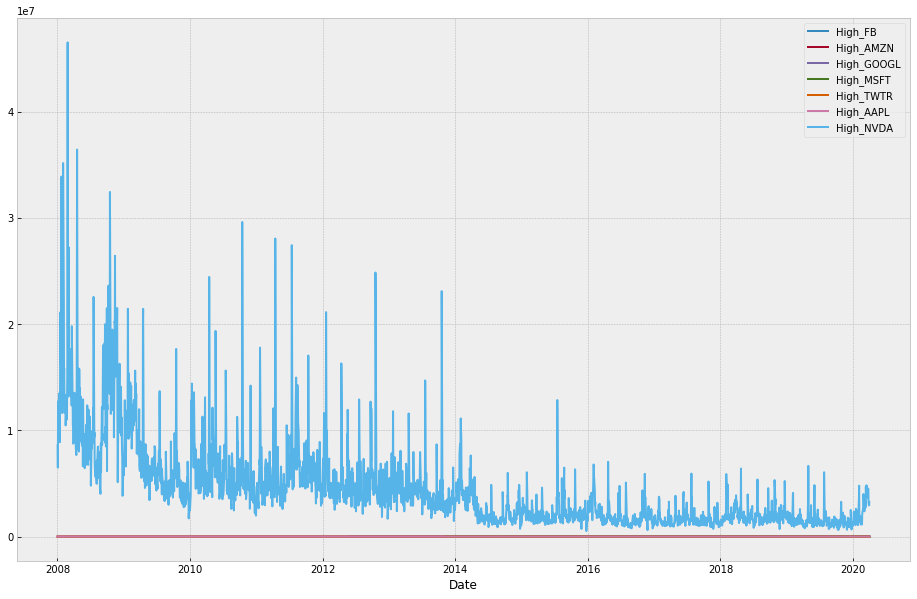

In [20]:
plt.figure(figsize=(16,10))
sns.lineplot(data = companies[['Date'] + [col for col in companies.columns if 'High' in col]].set_index('Date'), dashes=False)

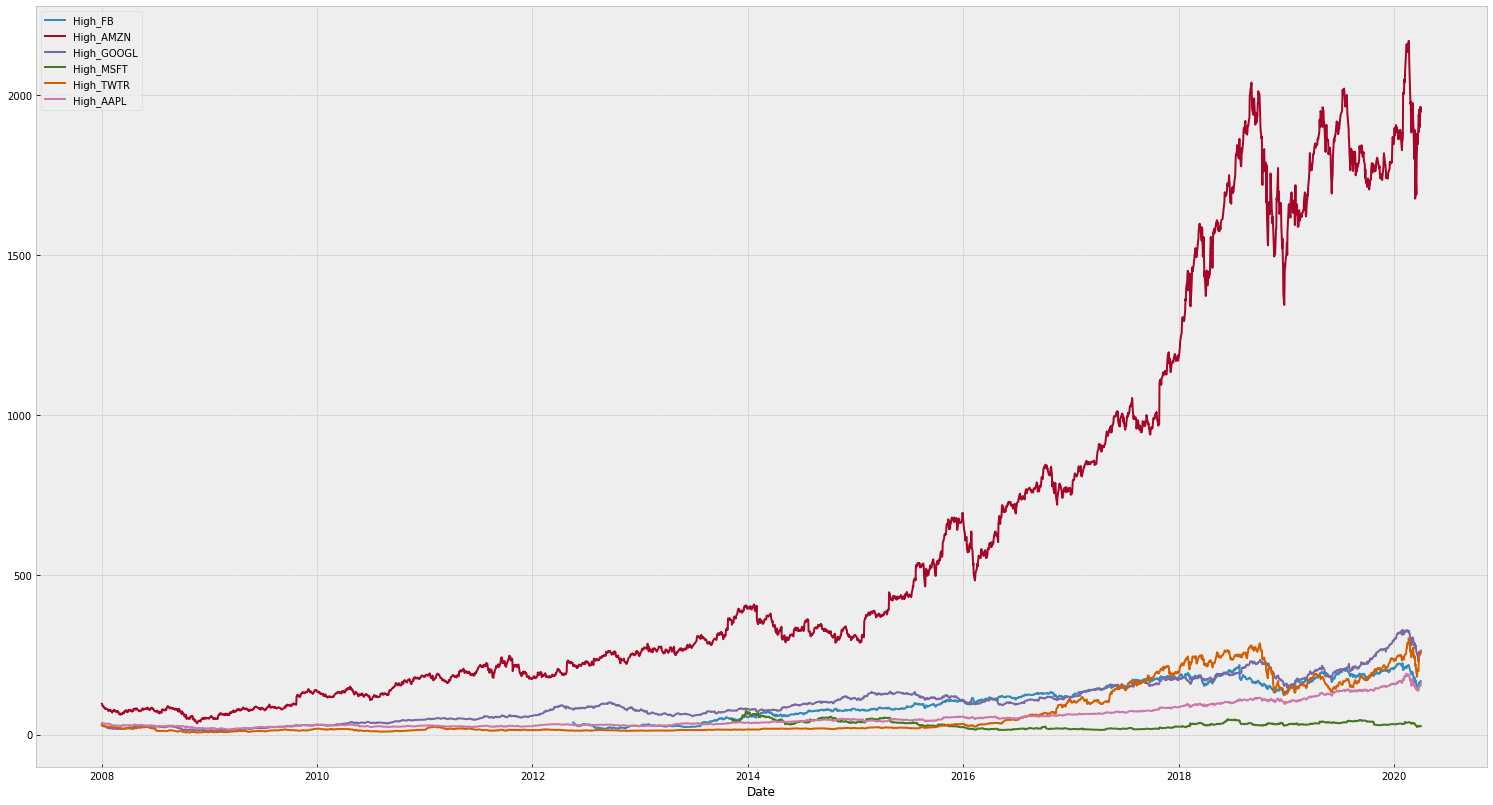

In [21]:
plt.figure(figsize=(26,14))
data_companies_line = companies[['Date'] + [col for col in companies.columns if 'High' in col]]
data_companies_line=data_companies_line.drop(['High_NVDA'], axis=1)
sns.lineplot(data = data_companies_line.set_index('Date'), dashes=False)


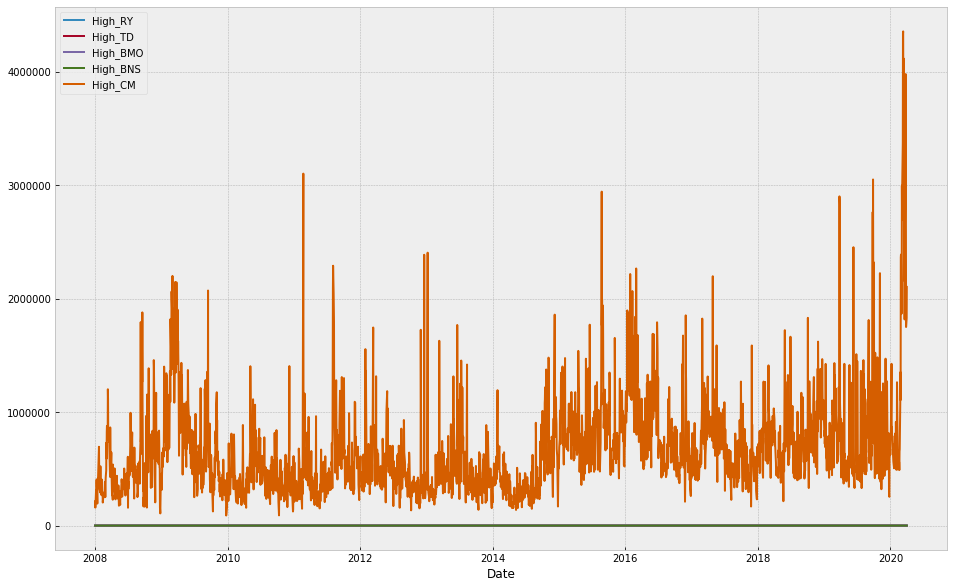

In [22]:
plt.figure(figsize=(16,10))
sns.lineplot(data = banks[['Date'] + [col for col in banks.columns if 'High' in col]].set_index('Date'), dashes=False)


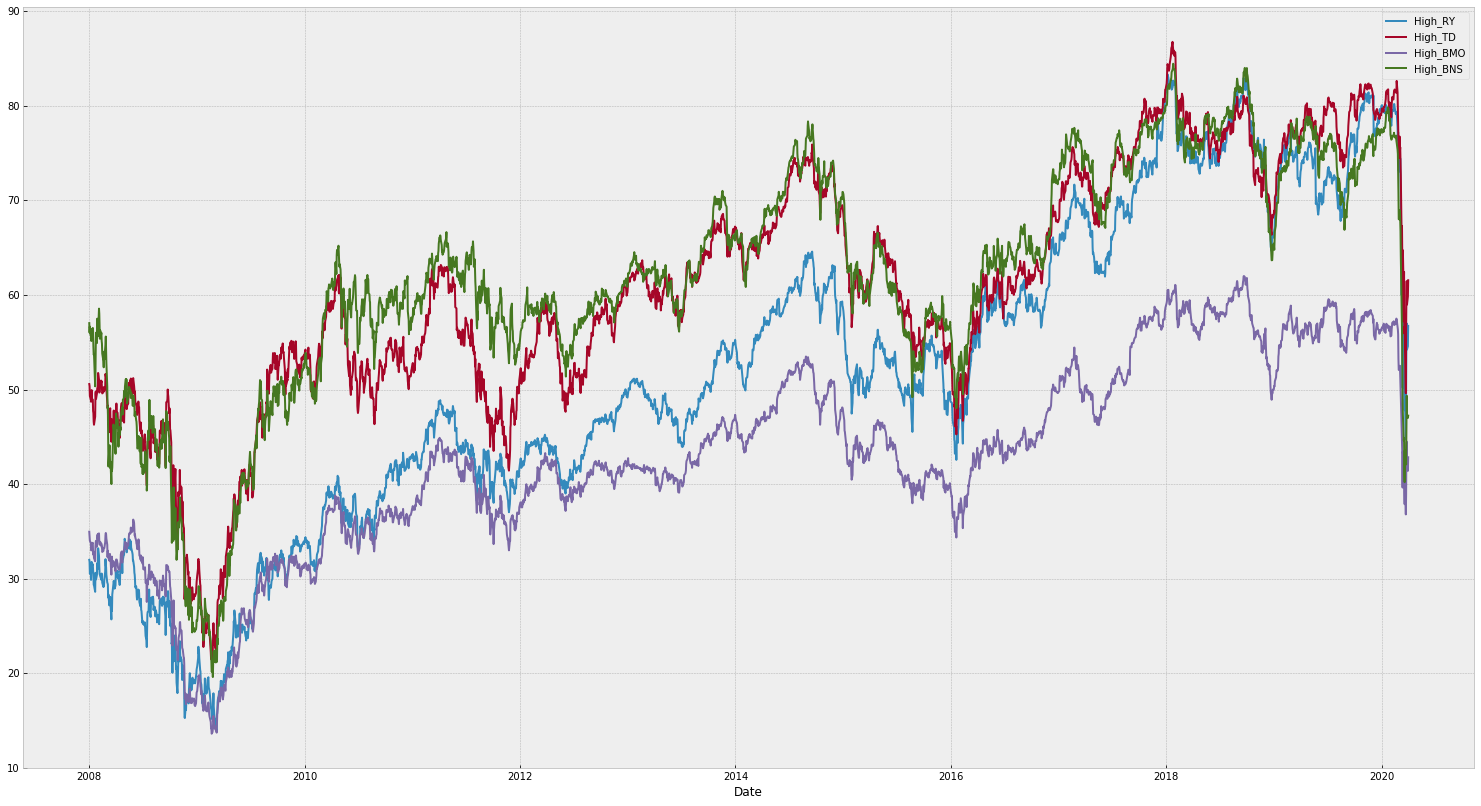

In [23]:
plt.figure(figsize=(26,14))
data_banks_line = banks[['Date'] + [col for col in banks.columns if 'High' in col]]
data_banks_line=data_banks_line.drop(['High_CM'], axis=1)
sns.lineplot(data = data_banks_line.set_index('Date'), dashes=False)


# <center>Normalizing the data</center>

In [53]:
# cols = ['Open_','High_','Low_','Close_']
# def data_normalizer(df, col_names):
#     lis = []
#     for i in col_names:
#         for j in cols:
#             min_max_scaler = sklearn.preprocessing.MinMaxScaler()
#             df[''+str(j)+str(i)+''] = min_max_scaler.fit_transform(df[''+str(j)+str(i)+''].values.reshape(-1,1))
#             lis.extend([''+str(j)+str(i)+''])
#     return df[lis]


In [ ]:
# data_companies = data_normalizer(companies.copy(), top_companies)
# data_banks = data_normalizer(banks.copy(),top_banks)
# del cols,data_normalizer

In [24]:
#banks_normalized = banks.drop('Date', axis=1)
banks.corr()['Open_BMO'].sort_values(ascending= False)

Open_BMO         1.000000
Adj Close_TD     0.998907
Low_BNS          0.998584
Volume_TD        0.998356
Volume_BMO       0.947719
Open_BNS         0.947374
Adj Close_BMO    0.947124
Close_TD         0.947043
Low_BMO          0.880702
High_BNS         0.878427
Volume_RY        0.878284
Open_TD          0.876671
Close_BNS        0.814959
Adj Close_BNS    0.814523
Adj Close_CM     0.812278
Low_TD           0.812080
High_TD          0.810488
Volume_BNS       0.810389
High_BMO         0.809796
Close_BMO        0.807573
Close_RY         0.802507
High_RY          0.710352
Adj Close_RY     0.684807
Open_RY          0.647315
Low_RY           0.641721
Low_CM          -0.244377
High_CM         -0.298811
Close_CM        -0.306043
Open_CM         -0.521494
Volume_CM       -0.617687
Name: Open_BMO, dtype: float64

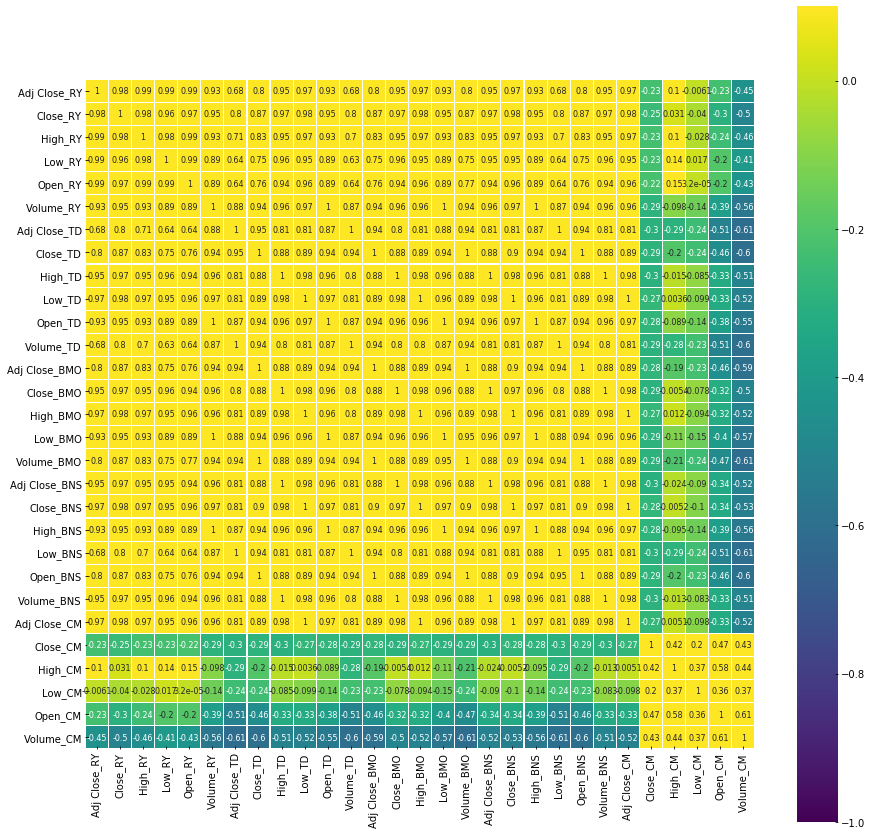

In [25]:
import seaborn as sns
correlation = banks.select_dtypes(include=['float64', 'int64'])
correlation = correlation.drop('Open_BMO', axis=1).corr()
fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(correlation, cmap='viridis', 
            vmax=0.1, 
            vmin=-1.0, 
            linewidth=0.1,
            annot=True, 
            annot_kws={"size":8}, 
            square=True)

checking the features for multiple collinearity

Partitioning the data into test train and validation sets

In [94]:
def split_train_test(data, test_ratio, validation_set_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data)*test_ratio)
    validation_size = int(len(data)*validation_set_ratio)
    test_indices = shuffled_indices[:test_set_size]
    validation_indices = shuffled_indices[test_set_size:test_set_size+validation_size]
    train_indices = shuffled_indices[test_set_size+validation_size:]
    return data.iloc[train_indices], data.iloc[validation_indices], data.iloc[test_indices]

bank_train, bank_validation, bank_test = split_train_test(banks.drop('Date', axis=1), 0.2,0.2)

In [100]:
bank_train_data = bank_train.drop('Open_BMO', axis=1)
bank_train_labels = bank_train['Open_BMO']
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
bank_train_data_scaled = scaler.fit_transform(bank_train_data)

In [102]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(bank_train_data_scaled,bank_train_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [103]:
from sklearn.metrics import mean_squared_error
stock_predictions = lin_reg.predict(bank_train_data_scaled)
lin_mse = mean_squared_error(bank_train_labels, stock_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.15799525224933766

In [106]:
from sklearn.metrics import mean_absolute_error
lin_mae = mean_absolute_error(bank_train_labels, stock_predictions)
lin_mae

0.10908237333999447

Trying it on cross validation set

In [107]:
bank_validation_data = bank_validation.drop('Open_BMO', axis=1)
bank_validation_labels = bank_validation['Open_BMO']
banks_data_scaled_val = scaler.fit_transform(bank_validation_data)

In [110]:
stock_predictions_val = lin_reg.predict(banks_data_scaled_val)
lin_mse_val = mean_squared_error(bank_validation_labels, stock_predictions_val)
lin_rmse_val = np.sqrt(lin_mse_val)
lin_rmse_val

0.9796218480506242

In [111]:
lin_mae = mean_absolute_error(bank_validation_labels, stock_predictions_val)
lin_mae

0.7233911001316092

Calculating VIF

In [114]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(bank_train_data.values, i) for i in range(bank_train_data.shape[1])]
vif["features"] = bank_train_data.columns

In [124]:
vif.round(1).sort_values('VIF Factor', ascending=False)

,VIF Factor,features
8,166451.1,High_TD
9,157144.2,Low_TD
14,156352.0,High_BMO
13,152039.5,Close_BMO
17,142325.7,Adj Close_BNS
5,138600.4,Volume_RY
18,131281.3,Close_BNS
10,122115.2,Open_TD
11,120724.5,Volume_TD
15,117677.3,Low_BMO


In [46]:
pd.DataFrame(banks_data_scaled, columns = banks_data.columns)

,Adj Close_RY,Close_RY,High_RY,Low_RY,Open_RY,Volume_RY,Adj Close_TD,Close_TD,High_TD,Low_TD,Open_TD,Volume_TD,Adj Close_BMO,Close_BMO,High_BMO,Low_BMO,Volume_BMO,Adj Close_BNS,Close_BNS,High_BNS,Low_BNS,Open_BNS,Volume_BNS,Adj Close_CM,Close_CM,High_CM,Low_CM,Open_CM,Volume_CM
0,-1.110769,-1.122239,-1.176227,-1.127702,-1.245559,-0.486709,-0.284561,-0.353367,-0.809167,-0.811081,-0.435075,-0.245267,-0.339545,-0.789185,-0.787386,-0.452992,-0.337441,-0.786094,-0.788971,-0.399570,-0.201582,-0.326603,-0.766267,-0.754586,-0.873379,-1.080253,-0.221034,-0.761430,0.127070
1,-1.086911,-1.139333,-1.188300,-1.134467,-1.249260,-0.425427,-0.325938,-0.389240,-0.824791,-0.821814,-0.442397,-0.322089,-0.396124,-0.823796,-0.831468,-0.464973,-0.390793,-0.814756,-0.825864,-0.481113,-0.282060,-0.344941,-0.781894,-0.804826,-0.916272,-1.213752,-0.572268,-0.600989,0.108781
2,-1.133058,-1.217682,-1.263958,-1.170663,-1.275503,-0.543960,-0.515581,-0.614042,-0.908378,-0.897921,-0.469242,-0.421026,-0.414714,-0.885151,-0.880938,-0.519286,-0.565759,-0.869754,-0.868098,-0.429442,-0.369435,-0.411913,-0.844399,-0.850189,-0.921438,-1.137086,-0.212554,-0.412008,0.341482
3,-1.115478,-1.252344,-1.241153,-1.182841,-1.302420,-0.498804,-0.599484,-0.546282,-0.936500,-0.975980,-0.518866,-0.508323,-0.556163,-0.915828,-0.902489,-0.524877,-0.645004,-0.914683,-0.967613,-0.505333,-0.500497,-0.517154,-0.923312,-0.917014,-0.471390,-0.840826,-0.042473,0.019639,6.558573
4,-1.135569,-1.285583,-1.302859,-1.190960,-1.313860,-0.550410,-0.679939,-0.729631,-0.955249,-1.009155,-0.456226,-0.564194,-0.512517,-0.901669,-0.942163,-0.505708,-0.696003,-0.910810,-0.975380,-0.448819,-0.555682,-0.459750,-0.927219,-0.964328,-0.773443,-0.983756,-0.049540,-0.029110,3.173085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3078,0.064210,0.116043,0.201174,0.734954,0.627051,-1.105983,-1.439662,-1.468608,-0.098290,-0.125140,-0.900402,-1.330084,-1.367674,0.103607,0.081517,-1.323592,-1.759135,-0.286458,-0.312755,-1.303799,-1.752492,-1.764899,-0.267784,-0.294619,3.577244,8.026687,3.002967,3.716564,3.478157
3079,0.159583,0.247159,0.316903,0.841541,0.732395,-0.979387,-1.273006,-1.392877,0.040761,0.015366,-0.858913,-1.190408,-1.297354,0.167322,0.145191,-1.016885,-1.462556,-0.010690,-0.050618,-1.019613,-1.379998,-1.505782,-0.036513,-0.049758,1.620524,4.900590,2.244434,2.920685,2.621988
3080,0.023510,0.006630,0.152578,0.693037,0.560480,-1.160008,-1.578734,-1.616882,-0.152973,-0.213932,-1.082628,-1.477907,-1.542262,-0.069446,-0.099708,-1.221356,-1.612415,-0.202798,-0.261298,-1.181890,-1.460475,-1.591092,-0.131053,-0.165847,0.767140,2.635948,1.391673,2.016046,1.337168
3081,0.041734,0.005725,0.173046,0.744535,0.619004,-1.135818,-1.579884,-1.588981,-0.085791,-0.135873,-1.171300,-1.619911,-1.656229,-0.112709,-0.156525,-1.261292,-1.710490,-0.277937,-0.304017,-1.208532,-1.607633,-1.646901,-0.169338,-0.241939,0.796784,2.828699,1.061876,1.310724,1.848640
